In [71]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV



In [72]:
#calling the train file
train=pd.read_excel('Data_Train.xlsx')

In [73]:
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


There are 12690 rows and 9 columns

In [74]:
#calling test file
test=pd.read_excel('Data_Test.xlsx')

In [75]:
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


There are 4231 rows and 8 columns.

In [76]:
train.columns,test.columns

(Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
        'RATING', 'VOTES', 'COST'],
       dtype='object'),
 Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
        'RATING', 'VOTES'],
       dtype='object'))

Names of total columns present in the dataset.

In [77]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4 

As we can see there are null values in the votes, city, rating, locality columns of  train and test data.
the dtype is object only restaurant_id and cost is int64.

In [78]:
train.head()


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


First five rows and columns.

In [79]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


First five rows and columns.

In [80]:
#total count of rows and columns
train.shape,test.shape


((12690, 9), (4231, 8))

In [81]:
#unique values of train dataset
train.nunique().to_frame('No of unique values')

,No of unique values
TITLE,113
RESTAURANT_ID,11892
CUISINES,4155
TIME,2689
CITY,359
LOCALITY,1416
RATING,32
VOTES,1847
COST,86


In [82]:
#unique values of test dataset
test.nunique().to_frame('No of unique values')

,No of unique values
TITLE,86
RESTAURANT_ID,4127
CUISINES,1727
TIME,1183
CITY,151
LOCALITY,834
RATING,31
VOTES,1136


In [83]:
#checking for null values
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

there are 112 missing values in city,98 in locality, 2 in ratings and 1204 in votes column.

<Axes: >

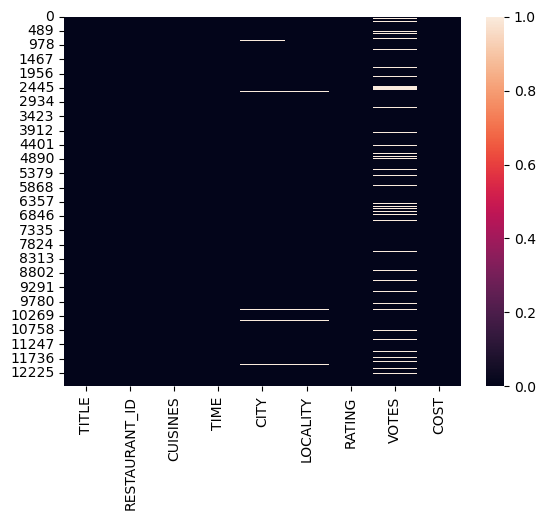

In [84]:
#visualization through heatmap of null values
sns.heatmap(train.isnull())

In [85]:
#checking for null values
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

there are 35 missing values in city, 30 in locality, 2 in ratings and 402 in votes.

<Axes: >

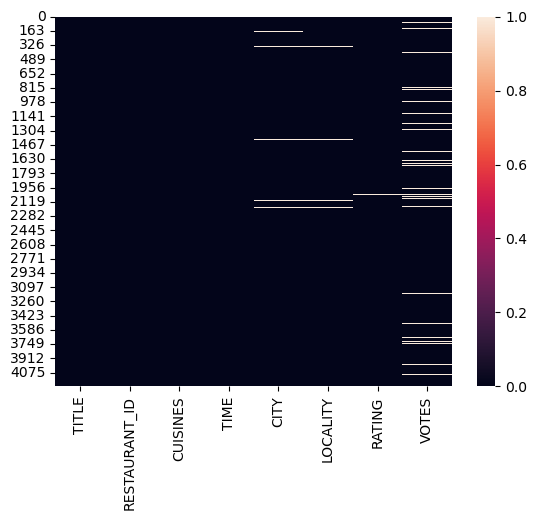

In [86]:
#visualization through heatmap of null values
sns.heatmap(test.isnull())

In [87]:
train['COST'].value_counts()

300      1595
400      1357
500      1300
200      1031
600       806
         ... 
8000        1
14000       1
5200        1
80          1
70          1
Name: COST, Length: 86, dtype: int64

value count of the rows.

<Axes: >

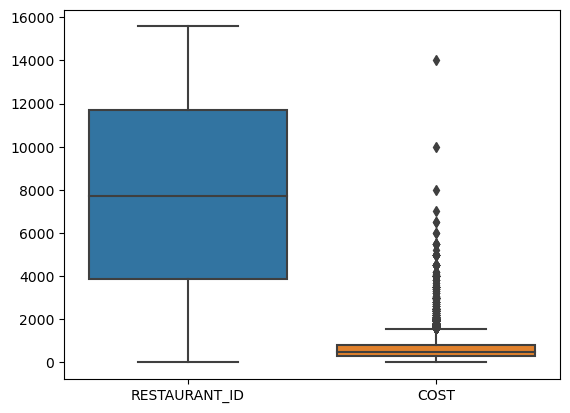

In [88]:
#dropping of duplicates values
train.drop_duplicates(inplace=True)
sns.boxplot(train)

In [89]:
train.describe()

,RESTAURANT_ID,COST
count,12665.000000,12665.000000
mean,7757.774734,655.400790
std,4506.166393,627.389831
min,0.000000,20.000000
25%,3861.000000,300.000000
50%,7739.000000,500.000000
75%,11689.000000,800.000000
max,15573.000000,14000.000000


1. This statistical data shows the that there are no missing values as the count of columns are same.
2. mean is greater than median(50%).
3. There is huge difference between the 75% and max which means there are outliers present in the dataset.

<Axes: xlabel='COST', ylabel='count'>

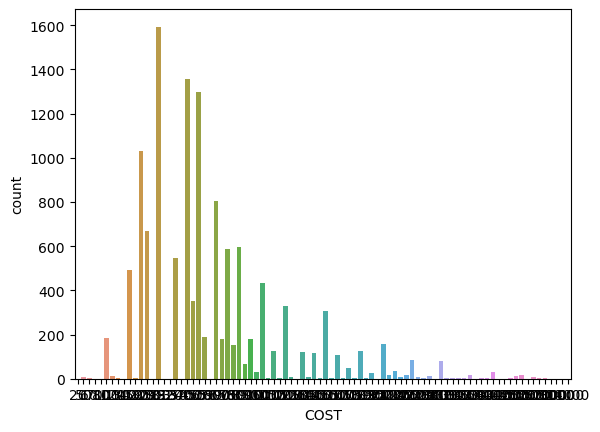

In [90]:
sns.countplot(data=train,x='COST')

In [91]:
train['CUISINES'].value_counts(normalize=True)

South Indian                                0.042006
North Indian                                0.041374
North Indian, Chinese                       0.039479
Fast Food                                   0.022582
Chinese                                     0.013186
                                              ...   
BBQ, Rolls                                  0.000079
Italian, North Indian, Chinese, Salad       0.000079
Andhra, Seafood, Biryani                    0.000079
Italian, Biryani, Fast Food                 0.000079
Finger Food, Continental, Asian, Chinese    0.000079
Name: CUISINES, Length: 4155, dtype: float64

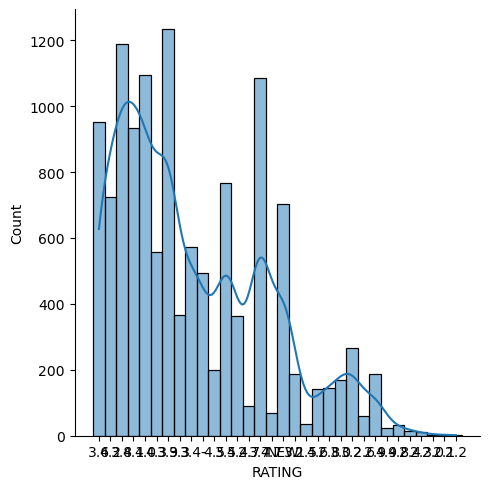

In [92]:
sns.displot(train['RATING'],kde=True)

In [93]:
print(pd.crosstab(train['CUISINES'],train['COST']))

COST                                                20     50     60     \
CUISINES                                                                  
Afghan, Mughlai                                         0      0      0   
African, Burger, Desserts, Beverages, Fast Food...      0      0      0   
American                                                0      0      0   
American, Arabian, Fast Food, Lebanese                  0      0      0   
American, Asian, Burger, Chinese, Desserts, Pan...      0      0      0   
...                                                   ...    ...    ...   
Vietnamese, Thai, Burmese, Japanese                     0      0      0   
Wraps                                                   0      0      0   
Wraps, Biryani, North Indian, Kebab, Desserts, ...      0      0      0   
Wraps, Fast Food                                        0      0      0   
Wraps, Sandwich, Rolls, Fast Food, Burger, Pizza        0      0      0   

COST                    

TYPES OF CUISINES AND THEIR COST RANGE.

In [94]:
#converting categorical data into numerical data
enc=OrdinalEncoder()
train[['CUISINES','LOCALITY','CITY','VOTES','RESTAURANT_ID','TIME','TITLE']]=enc.fit_transform(train[['CUISINES','LOCALITY','CITY','VOTES','RESTAURANT_ID','TIME','TITLE']])

In [95]:
train['COST']=train['COST'].astype(float)

In [96]:
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31.0,7196.0,2627.0,739.0,320.0,285.0,3.6,1278.0,1200.0
1,33.0,10075.0,289.0,1885.0,67.0,1046.0,4.2,950.0,1500.0
2,31.0,8349.0,2976.0,661.0,67.0,1101.0,3.8,712.0,800.0
3,95.0,4876.0,4130.0,275.0,222.0,136.0,4.1,787.0,800.0
4,50.0,11747.0,1766.0,615.0,222.0,620.0,3.8,470.0,300.0
...,...,...,...,...,...,...,...,...,...
12685,95.0,10100.0,2934.0,1144.0,131.0,342.0,3.8,1349.0,500.0
12686,33.0,7390.0,2143.0,1177.0,222.0,133.0,4.3,191.0,1800.0
12687,71.0,8518.0,2088.0,1137.0,239.0,1342.0,4.0,1428.0,1300.0
12688,31.0,4718.0,3506.0,1837.0,67.0,631.0,3.5,996.0,400.0


In [97]:
#CHECKING THE CORRELATION OF DEPENDENT AND INDEPENDENT VARIANCE
train.corr()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,VOTES,COST
TITLE,1.000000,0.002298,0.244363,0.054171,-0.012894,0.030642,0.002182,-0.263779
RESTAURANT_ID,0.002298,1.000000,0.056088,0.008424,0.005289,-0.003895,0.015170,0.041007
CUISINES,0.244363,0.056088,1.000000,0.105406,0.023559,0.017270,-0.002129,-0.014286
TIME,0.054171,0.008424,0.105406,1.000000,-0.010494,-0.007593,0.009840,0.018302
CITY,-0.012894,0.005289,0.023559,-0.010494,1.000000,0.037579,0.001697,0.043808
LOCALITY,0.030642,-0.003895,0.017270,-0.007593,0.037579,1.000000,0.004247,-0.016300
VOTES,0.002182,0.015170,-0.002129,0.009840,0.001697,0.004247,1.000000,0.004638
COST,-0.263779,0.041007,-0.014286,0.018302,0.043808,-0.016300,0.004638,1.000000


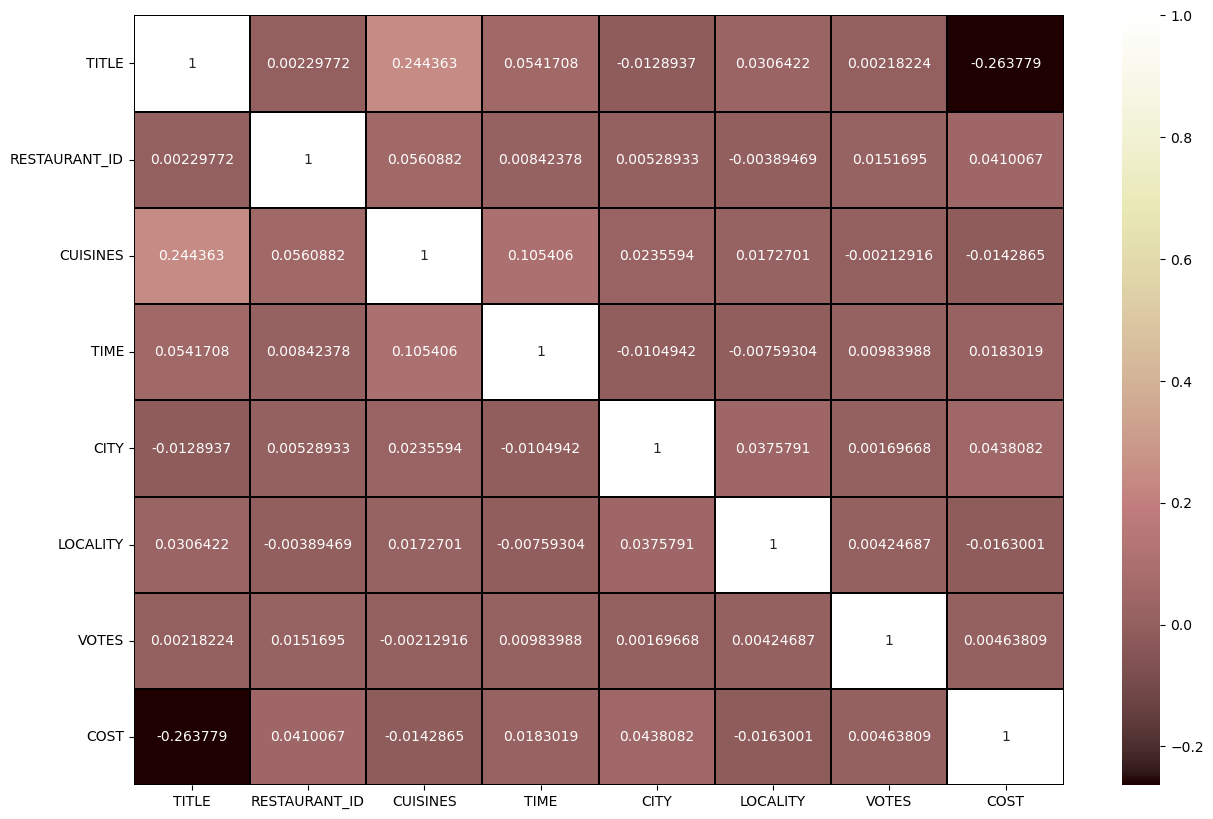

In [98]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),linewidths=0.1,fmt='1g',linecolor='black',annot=True,cmap='pink')
plt.yticks(rotation=0);
plt.show()

This is the correlation chart, as we can see the cost and title are highly negatively correlated. where as cost and city are highly positively correlated.

TITLE               Axes(0.125,0.786098;0.227941x0.0939024)
RESTAURANT_ID    Axes(0.398529,0.786098;0.227941x0.0939024)
CUISINES         Axes(0.672059,0.786098;0.227941x0.0939024)
TIME                Axes(0.125,0.673415;0.227941x0.0939024)
CITY             Axes(0.398529,0.673415;0.227941x0.0939024)
LOCALITY         Axes(0.672059,0.673415;0.227941x0.0939024)
VOTES               Axes(0.125,0.560732;0.227941x0.0939024)
COST             Axes(0.398529,0.560732;0.227941x0.0939024)
dtype: object

<Figure size 1500x2000 with 0 Axes>

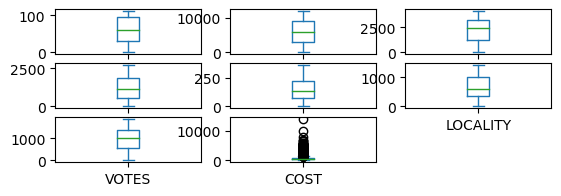

In [99]:
#checking for outliers
fig=plt.figure(figsize=(15,20))
train.plot(kind='box',subplots=True,layout=(7,3))  

In [100]:
#checking skewness
train.skew()

TITLE           -0.069827
RESTAURANT_ID    0.004129
CUISINES        -0.218312
TIME             0.305681
CITY             0.252063
LOCALITY         0.338968
VOTES           -0.186305
COST             3.978358
dtype: float64

In [101]:
#dropping all null values
train=train.dropna()

In [102]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [103]:
#seperating independent and target variables
x=train.drop('COST',axis=1)
y=train['COST']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (11372, 8)
label dimension (11372,)


In [104]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-0.85187002,  0.35994414,  0.3231945 , ..., -0.92503304,
        -0.43611093,  0.61404218],
       [-0.79045706,  1.19864747, -1.61179508, ...,  0.98352825,
         0.98541112, -0.03918376],
       [-0.85187002,  0.69583332,  0.61203598, ...,  1.12146632,
         0.03772975, -0.51317086],
       ...,
       [ 0.37638935,  0.74506599, -0.12289591, ...,  1.72588587,
         0.51157044,  0.91277355],
       [-0.85187002, -0.36194084,  1.05067776, ..., -0.05727718,
        -0.67303128,  0.0524272 ],
       [-0.85187002, -0.29697702,  0.5872072 , ...,  1.70331418,
        -0.90995162,  1.06612232]])

# Model building

In [105]:
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso

In [106]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pre=lr.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.22956141673783392 at random state 101


In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [108]:
#Ridge
rd=Ridge()
rd.fit(x_train,y_train)
pre=rd.predict(x_test)
pred=rd.predict(x_train)
print("R2 score:",r2_score(y_train,pred))
print("R2 score training data:",r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.15312440751189482
R2 score training data: 16.88703967865699
Mean absolute error: 357.75089270628877
Mean square error: 327225.07301417214
Root mean square error: 572.0359018577175


In [109]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.03964614110904052
4.949952443941319
Mean absolute error: 327.6836366454111
Mean square error: 374222.72809532925
Root mean square error: 611.7374666434363


In [110]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9557646289518416
72.26379732029727
Mean absolute error: 200.25147713950759
Mean square error: 109200.54961236812
Root mean square error: 330.4550644374635


In [111]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.5579227488838947
35.87276435255743
Mean absolute error: 300.40855803048066
Mean square error: 252476.1395310668
Root mean square error: 502.47003844116597


In [112]:
#Lasso
las=Lasso()
las.fit(x_train,y_train)
pre=las.predict(x_test)
pred=las.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.15310606796204096
16.876506073937403
Mean absolute error: 357.6478361360766
Mean square error: 327266.5450007329
Root mean square error: 572.0721501705295


In [113]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.15312440950416717
16.887093754816462
Mean absolute error: 357.75309352921414
Mean square error: 327224.86011025
Root mean square error: 572.0357157645403


# Cross Validation

In [114]:
# Cv score for Ridge
score= cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.13952949 0.14941041 0.16976705 0.15425994 0.17349598]
0.15729257388204923
difference between R2score and cross validation 1.1578363666115394


In [115]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.04569272 0.05155232 0.06735058 0.03826297 0.04719195]
0.05001010878907677
difference between R2score and cross validation 11.886082875908786


In [116]:
# Cv score for Random forest
score= cross_val_score(ra,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.65426827 0.6937124  0.72836755 0.69069539 0.75483628]
0.7043759761816384
difference between R2score and cross validation -53.55050386334737


In [117]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.3031731  0.36329023 0.34141882 0.30736053 0.40701432]
0.344451400314253
difference between R2score and cross validation -17.558046276608835


In [118]:
# Cv score for lasso
score= cross_val_score(las,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.13981121 0.14959255 0.16984622 0.15412869 0.17363834]
0.15740340226510727
difference between R2score and cross validation 1.1467535283057355


In [119]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.13952891 0.1494109  0.1697641  0.15425943 0.17349799]
0.1572922659956419
difference between R2score and cross validation 1.1578671552522735


Randomforest regrssor is our best best model as the difference between R2 score and cross validation score is least

# Setting Parameters

In [120]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [129]:
para={'n_neighbors':[5],
      'weights':['uniform'],
     'p':[2],}
knn_cv=GridSearchCV(knn,para,cv=5)
knn_cv.fit(x_train,y_train)
print(knn_cv.best_params_)

{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [131]:
knn_new=KNN(n_neighbors=5,p=2,weights='uniform')
knn_new.fit(x_train,y_train)
y_pred_new=knn_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

0.3587276435255743


In [132]:
knn_new.fit(x_train,y_train)
pre=knn_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.3587276435255743
mean absolute error: 300.40855803048066
mean square error; 252476.1395310668
root mean squre error: 502.47003844116597


In [134]:
import joblib
import pickle
filename="Restaurant_food.pkl"
pickle.dump(knn_new,open(filename,'wb'))

In [136]:
load_m=pickle.load(open('Restaurant_food.pkl','rb'))

In [137]:
result=load_m.score(x_test,y_test)
print(result*100)

35.87276435255743


In [138]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411
predicted,590.0,440.0,530.0,800.0,1060.0,1140.0,390.0,1010.0,360.0,500.0,...,1070.0,530.0,760.0,930.0,340.0,260.0,600.0,390.0,1000.0,380.0
orginal,900.0,350.0,700.0,700.0,800.0,700.0,300.0,1000.0,400.0,200.0,...,1800.0,200.0,800.0,1200.0,500.0,350.0,600.0,350.0,200.0,200.0
